In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gender_df = pd.read_csv("data/gender_submission.csv")
test_df = pd.read_csv("data/test.csv")
train_df = pd.read_csv("data/train.csv")

In [3]:
test_merged_df = test_df.merge(gender_df, on='PassengerId')
test_merged_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [4]:
test_merged_df = test_merged_df [["PassengerId", "Survived", "Pclass" ,"Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]]
test_merged_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
all_data_df = pd.concat([train_df, test_merged_df], ignore_index = True, sort = False)
all_data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
# Passenger Class Survival Graphs

In [8]:
all_data_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.575851
1,2,0.422383
2,3,0.269394


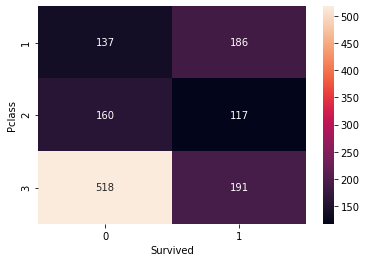

In [9]:
# Group the dataset by Pclass and Survived and then unstack them
group = all_data_df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")
plt.savefig("resource/images/Pclass_Survived_Heat.jpg")

In [10]:
#Class 1 passengers have a higher survival chance compared to classes 2 and 3.
#It implies that Pclass contributes a lot to a passenger’s survival rate.

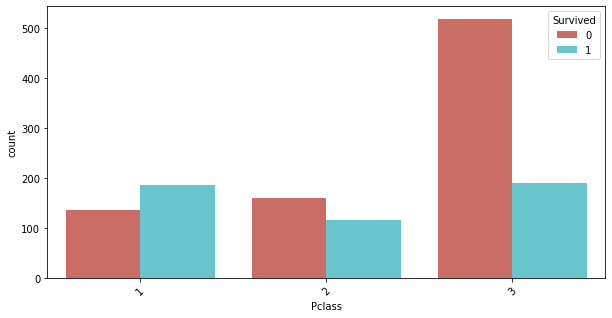

In [13]:
sns.countplot(x='Pclass', data=all_data_df, palette='hls', hue='Survived')
plt.xticks(rotation=45)

plt.savefig('resource/images/Pclass_Survived_Bar.jpg')

In [26]:
# Sex Survival Graphs

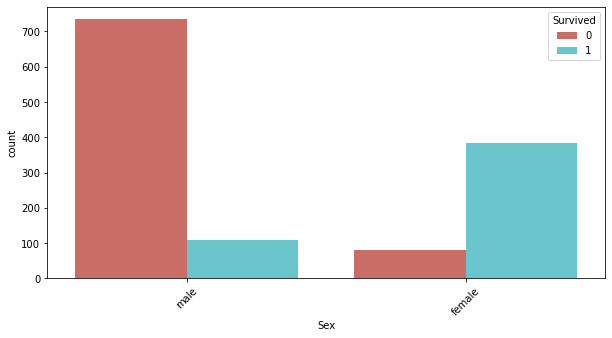

In [14]:
plt.figure(2)
sns.countplot(x='Sex', data=all_data_df, palette='hls', hue='Survived')
plt.xticks(rotation=45)

plt.savefig("resource/images/Sex_Survived_Bar.jpg")

In [28]:
#Male survival rate is about 20% where women is around 75%

In [29]:
# Age Survival Graphs

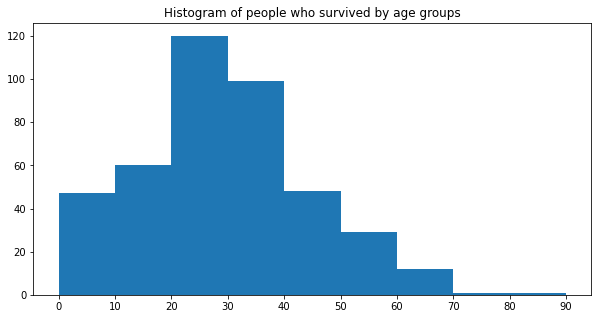

In [15]:
plt.figure(3)
age = all_data_df.loc[all_data_df.Survived == 1, "Age"]
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))
plt.title("Histogram of people who survived by age groups")
plt.savefig("resource/images/Age_Survived_Hist.jpg")

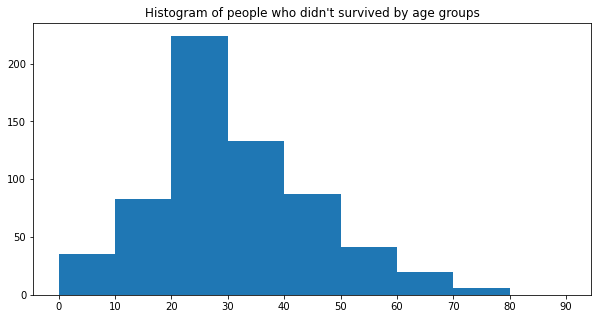

In [16]:
plt.figure(4)
age = all_data_df.loc[all_data_df.Survived == 0, "Age"]
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))
plt.title("Histogram of people who didn't survived by age groups")
plt.savefig("resource/images/Age_NotSurvived_Hist.jpg")

In [17]:
# Embarked Survival Graph

In [18]:
all_data_df[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Embarked,Survived
0,C,0.492593
1,Q,0.439024
2,S,0.333698


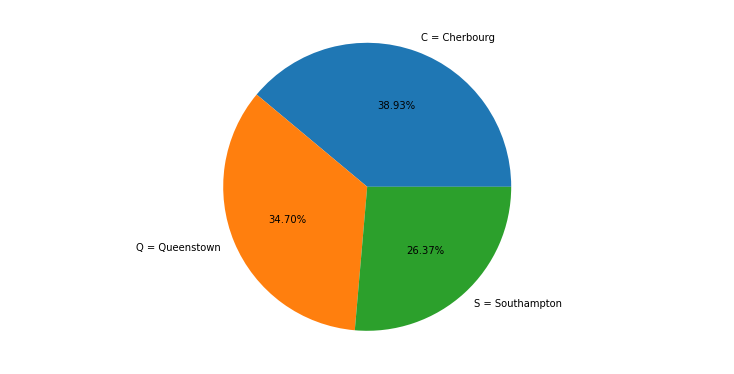

In [20]:
pie = plt.figure(5)
ax = pie.add_axes([0,0,1,1])
ax.axis("equal")
l=["C = Cherbourg", "Q = Queenstown", "S = Southampton"]
s=[0.492593, 0.439024, 0.333698]
ax.pie(s, labels = l, autopct="%1.2f%%")

plt.savefig("resource/images/Embarked_Survived_Pie.jpg")

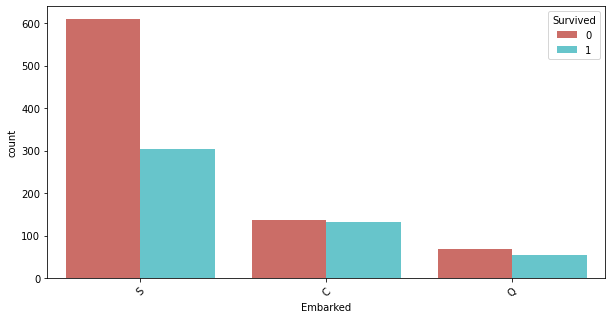

In [21]:
plt.figure(6)
sns.countplot(x='Embarked', data=all_data_df, palette='hls', hue='Survived')
plt.xticks(rotation=45)

plt.savefig("resource/images/Embarked_Survived_Bar.jpg")

In [22]:
#Majority of the passengers boarded from S. So, the missing values can be filled with S.
#Majority of class 3 passengers boarded from Q.
#S looks lucky for class 1 and 2 passengers compared to class 3.